### Exploring Splitting with Gini Index and Entropy
- This will be repurposed from Decision Tree Classifiers

In [1]:
from dataclasses import dataclass
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X,y = data['data'], data['target']

### Implementing Equation 18.5 

The goal of a Decision Tree is to find feature $j_i$ and threshold $t_i$ that minimizes the weighted sum of the cost of Left Subtree $c(D^L_i(j,t))$ and Right Subtree $c(D^R_i(j,t))$

Or more precisely

$(j_i, t_i) = \arg \min_{j \in \{1,..,D\}} \min_{t \in T_j} \frac{|D^L_i (j,t)|}{|D_i|} c(D^L_i(j,t)) + \frac{|D^R_i (j,t)|}{|D_i|} c(D^R_i(j,t))$

We're implementing the equation above.

### Gini Index 

For classification, we first compute the empirical distribution over class labels for this node: 

$\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$

Given this, we can then compute the **Gini Index**

$G_i = \sum_{c=1}^{C} \hat{\pi_{ic}} (1 - \hat{\pi_{ic}}) = \sum_{c=1}^C \hat{\pi_{ic}} - \sum_{c=1}^C \hat{\pi_{ic}}^2 = 1 - \sum_{c=1} \hat{\pi_{ic}}^2$


#### Entropy

$H_i = H(\hat{\pi_{ic}}) = -\sum_{c=1}^{C} \hat{\pi_{ic}} \space log \space \hat{\pi_{ic}}$

In [3]:
feat_index = 2

thresh = np.unique(X[:,feat_index]).reshape(1,-1)
selected_feat = X[:,feat_index].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~is_left_sampler

print(is_left_sampler.shape)
print(is_right_sampler.shape)

(150, 43)
(150, 43)


In [4]:
def one_hot_encode(y):
    num_cats = np.unique(y).shape[0]
    return np.eye(num_cats)[y], num_cats

y_one_hot, num_cats = one_hot_encode(y)
print('y_one_hot.shape = ', y_one_hot.shape)
print('num_cats = ', num_cats)

y_one_hot.shape =  (150, 3)
num_cats =  3


In [132]:
num_thresh = is_left_sampler.shape[1]
y_oh_3d = np.stack(num_thresh * [y_one_hot], axis=1)
print(y_oh_3d.shape)

(150, 43, 3)


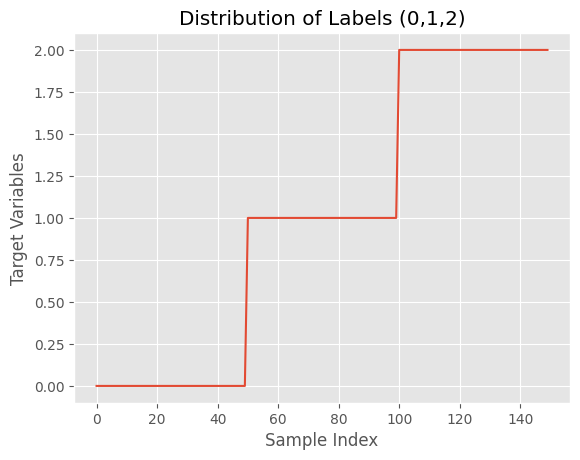

In [133]:
import matplotlib.pyplot as plt

figsize=(7,5)

plt.style.use('ggplot')
plt.plot(np.arange(y.shape[0]), y)
plt.title('Distribution of Labels (0,1,2)')
plt.xlabel('Sample Index')
plt.ylabel('Target Variables')
plt.show()

In [134]:
is_left_sampler_3d = np.stack(num_cats * [ is_left_sampler ], axis=2)
is_right_sampler_3d = np.stack(num_cats * [ is_right_sampler ], axis=2)

print(is_left_sampler_3d.shape)
print(is_right_sampler_3d.shape)

(150, 43, 3)
(150, 43, 3)


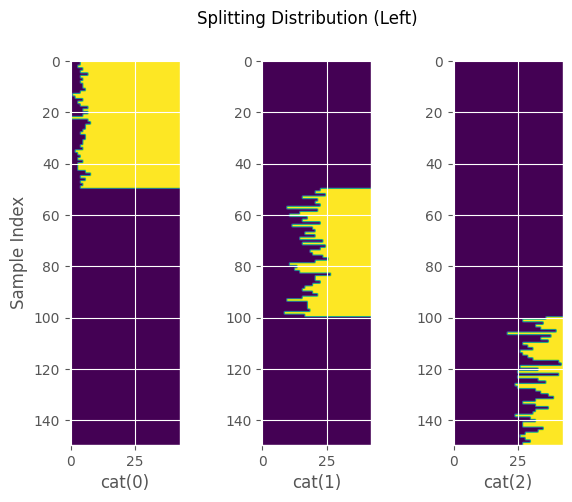

In [135]:
sampled_left = is_left_sampler_3d * y_oh_3d
sampled_right = is_right_sampler_3d * y_oh_3d

figsize = (7, 5)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=figsize)
axs1.imshow(sampled_left[:,:,0])
axs1.set_xlabel('cat(0)')
axs1.set_ylabel('Sample Index')
axs2.imshow(sampled_left[:,:,1])
axs2.set_xlabel('cat(1)')
axs3.imshow(sampled_left[:,:,2])
axs3.set_xlabel('cat(2)')
plt.style.use('ggplot')
plt.suptitle('Splitting Distribution (Left)')
plt.show()

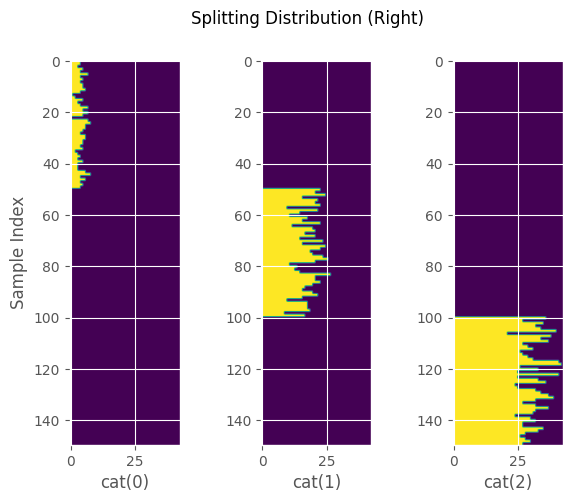

In [136]:
figsize = (7, 5)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=figsize)
axs1.imshow(sampled_right[:,:,0])
axs1.set_xlabel('cat(0)')
axs1.set_ylabel('Sample Index')
axs2.imshow(sampled_right[:,:,1])
axs2.set_xlabel('cat(1)')
axs3.imshow(sampled_right[:,:,2])
axs3.set_xlabel('cat(2)')
plt.style.use('ggplot')
plt.suptitle('Splitting Distribution (Right)')
plt.show()

### We want to compute Gini Index 

For classification, we first compute the empirical distribution over class labels for this node: 

$\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$

Given this, we can then compute the **Gini Index**

$G_i = \sum_{c=1}^{C} \hat{\pi_{ic}} (1 - \hat{\pi_{ic}}) = \sum_{c=1}^C \hat{\pi_{ic}} - \sum_{c=1}^C \hat{\pi_{ic}}^2 = 1 - \sum_{c=1} \hat{\pi_{ic}}^2$

### Question
How to calculate $| D_i |$ first?

#### Answer
Take the sum of `is_left_sampler` and `is_right_sampler` along the row axis (`axis=0`)

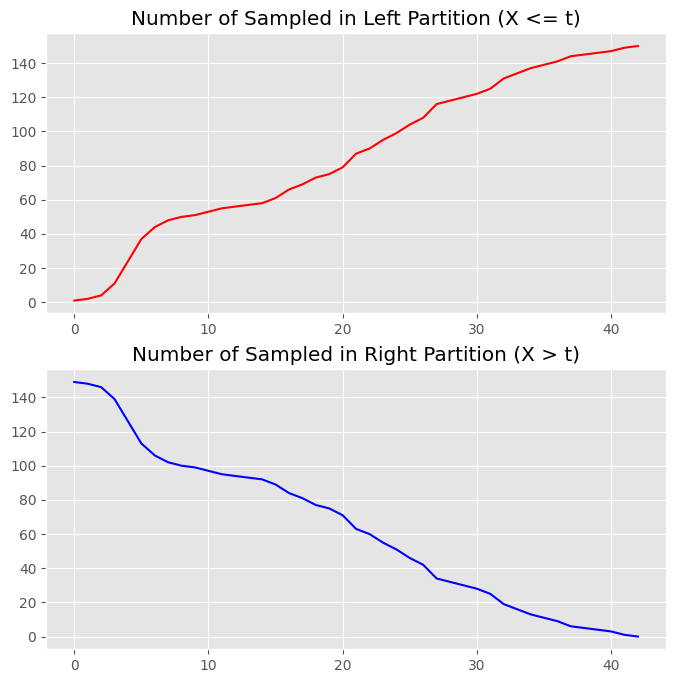

is_left_sampler.shape =  (150, 43)
num_sampled_left.shape =  (43, 3)

is_right_sampler.shape =  (150, 43)
num_sampled_right.shape =  (43, 3)


In [137]:
num_sampled_left = np.sum(is_left_sampler, axis=0)
num_sampled_right = np.sum(is_right_sampler, axis=0)

figsize=(8,8)
fig, (axs1, axs2) = plt.subplots(2,1, figsize=figsize)

axs1.plot(np.arange(num_sampled_left.shape[0]), num_sampled_left, color='red')
axs1.set_title('Number of Sampled in Left Partition (X <= t)')
axs2.plot(np.arange(num_sampled_right.shape[0]), num_sampled_right, color='blue')
axs2.set_title('Number of Sampled in Right Partition (X > t)')
plt.show()

num_sampled_left = np.stack( num_cats *[ num_sampled_left ], axis=1) 
num_sampled_right = np.stack( num_cats *[ num_sampled_right ], axis=1) 

print('is_left_sampler.shape = ', is_left_sampler.shape)
print('num_sampled_left.shape = ', num_sampled_left.shape)
print('')

print('is_right_sampler.shape = ', is_right_sampler.shape)
print('num_sampled_right.shape = ', num_sampled_right.shape)

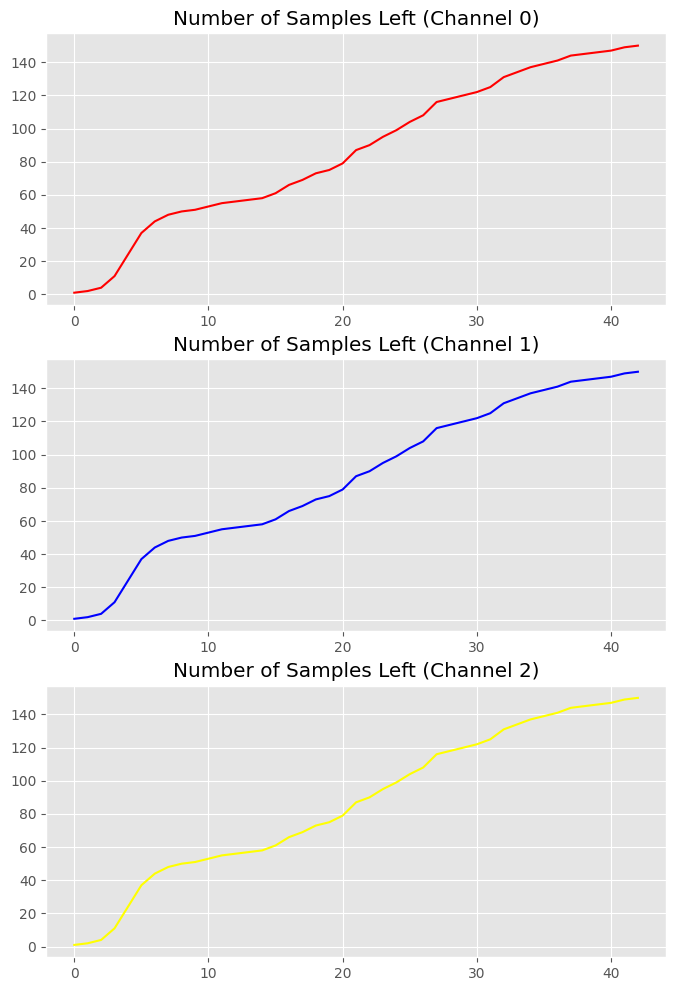

In [138]:
figsize=(8,12)
fig, (axs1, axs2, axs3) = plt.subplots(3,1, figsize=figsize)

axs1.plot(np.arange(num_sampled_left.shape[0]), num_sampled_left[:,0], color='red')
axs1.set_title('Number of Samples Left (Channel 0)')

axs2.plot(np.arange(num_sampled_left.shape[0]), num_sampled_left[:,1], color='blue')
axs2.set_title('Number of Samples Left (Channel 1)')

axs3.plot(np.arange(num_sampled_left.shape[0]), num_sampled_left[:,2], color='yellow')
axs3.set_title('Number of Samples Left (Channel 2)')

plt.show()

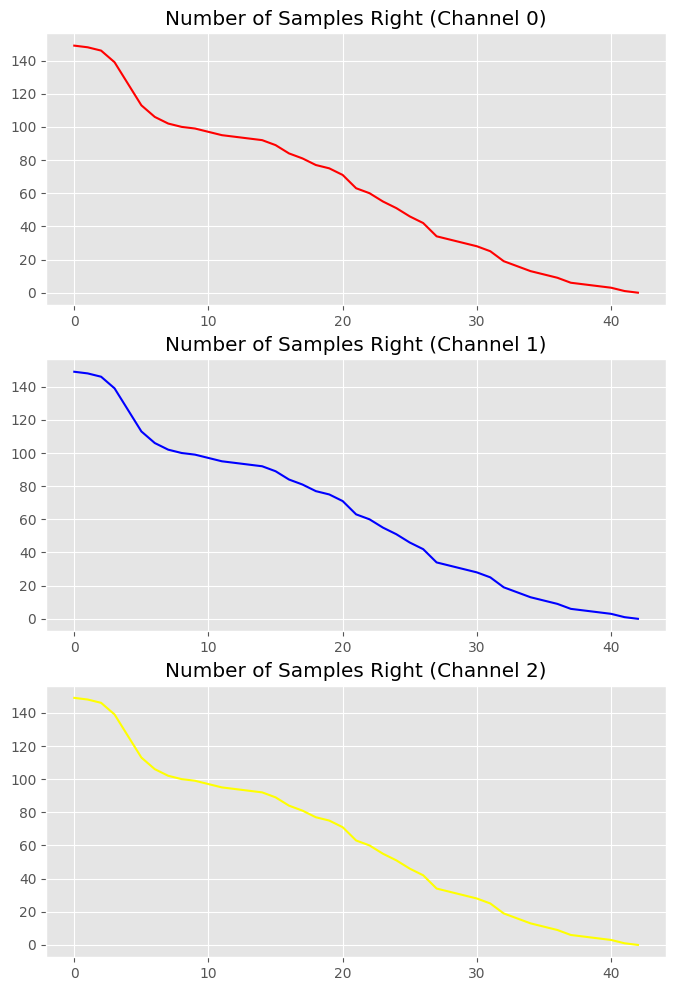

In [139]:
figsize=(8,12)
fig, (axs1, axs2, axs3) = plt.subplots(3,1, figsize=figsize)

axs1.plot(np.arange(num_sampled_left.shape[0]), num_sampled_right[:,0], color='red')
axs1.set_title('Number of Samples Right (Channel 0)')

axs2.plot(np.arange(num_sampled_left.shape[0]), num_sampled_right[:,1], color='blue')
axs2.set_title('Number of Samples Right (Channel 1)')

axs3.plot(np.arange(num_sampled_left.shape[0]), num_sampled_right[:,2], color='yellow')
axs3.set_title('Number of Samples Right (Channel 2)')

plt.show()

In [140]:
print('sampled_left.shape = ', sampled_left.shape)
print('sampled_right.shape = ', sampled_right.shape)

sampled_left.shape =  (150, 43, 3)
sampled_right.shape =  (150, 43, 3)


### Implementing
Implementing the Probability of each Classes

$\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$



indicator_sum_left.shape =  (43, 3)
indicator_sum_right.shape =  (43, 3)


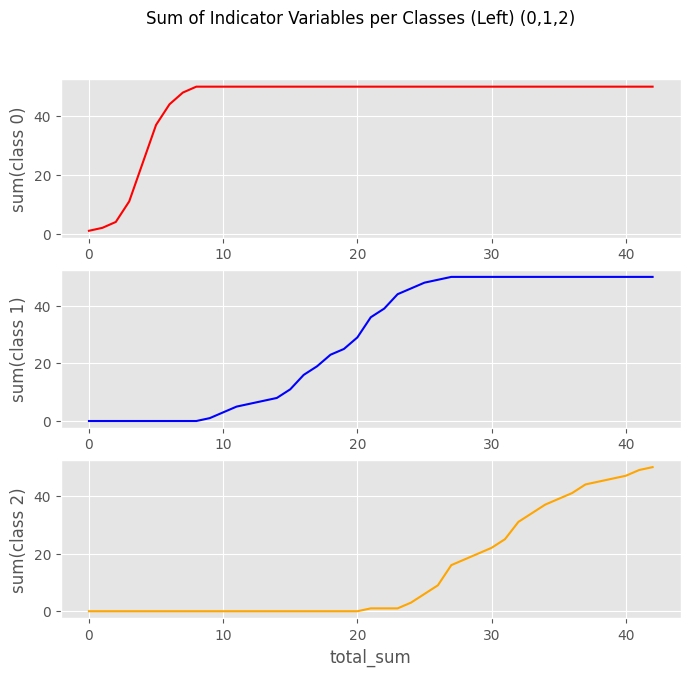

In [141]:
indicator_sum_left = np.sum(sampled_left, axis=0)
indicator_sum_right = np.sum(sampled_right, axis=0)

print('indicator_sum_left.shape = ', indicator_sum_left.shape)
print('indicator_sum_right.shape = ', indicator_sum_right.shape)

figsize = (8, 7)
fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=figsize)
axs1.plot(np.arange(indicator_sum_left.shape[0]), indicator_sum_left[:,0], color='red')
axs1.set_ylabel('sum(class 0)')

axs2.plot(np.arange(indicator_sum_left.shape[0]), indicator_sum_left[:,1], color='blue')
axs2.set_ylabel('sum(class 1)')

axs3.plot(np.arange(indicator_sum_left.shape[0]), indicator_sum_left[:,2], color='orange')
axs3.set_ylabel('sum(class 2)')
axs3.set_xlabel('total_sum')

plt.style.use('ggplot')
plt.suptitle('Sum of Indicator Variables per Classes (Left) (0,1,2)')
plt.show()

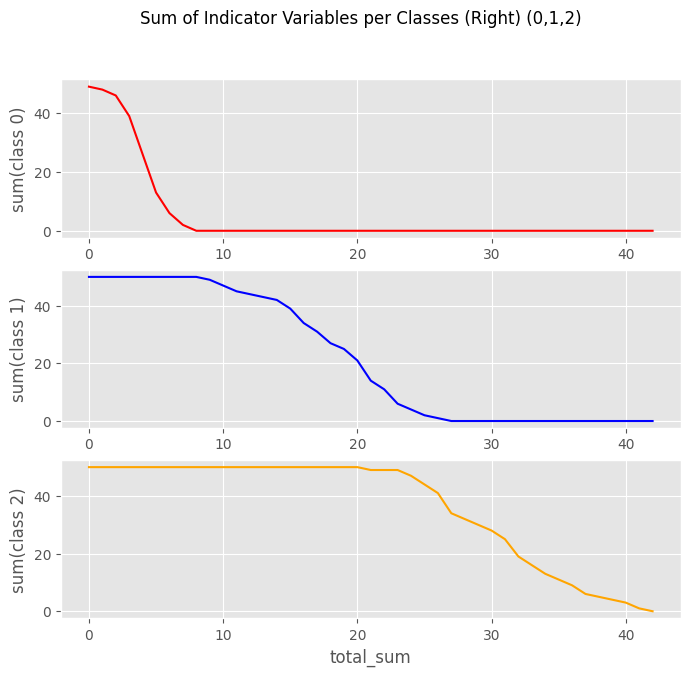

In [142]:
figsize = (8, 7)
fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=figsize)
axs1.plot(np.arange(indicator_sum_left.shape[0]), indicator_sum_right[:,0], color='red')
axs1.set_ylabel('sum(class 0)')

axs2.plot(np.arange(indicator_sum_left.shape[0]), indicator_sum_right[:,1], color='blue')
axs2.set_ylabel('sum(class 1)')

axs3.plot(np.arange(indicator_sum_left.shape[0]), indicator_sum_right[:,2], color='orange')
axs3.set_ylabel('sum(class 2)')
axs3.set_xlabel('total_sum')

plt.style.use('ggplot')
plt.suptitle('Sum of Indicator Variables per Classes (Right) (0,1,2)')
plt.show()

In [143]:
print('num_sampled_left.shape = ', num_sampled_left.shape)
print('prob_class_left.shape = ', indicator_sum_left.shape)

print('num_sampled_right.shape = ', num_sampled_right.shape)
print('prob_class_right.shape = ', indicator_sum_right.shape)

num_sampled_left.shape =  (43, 3)
prob_class_left.shape =  (43, 3)
num_sampled_right.shape =  (43, 3)
prob_class_right.shape =  (43, 3)


In [144]:
prob_class_left = np.where(num_sampled_left == 0, 0, indicator_sum_left / num_sampled_left )
prob_class_right = np.where(num_sampled_right == 0, 0, indicator_sum_right / num_sampled_right )

/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_2827/1203132204.py:2: RuntimeWarning: invalid value encountered in divide
  prob_class_right = np.where(num_sampled_right == 0, 0, indicator_sum_right / num_sampled_right )


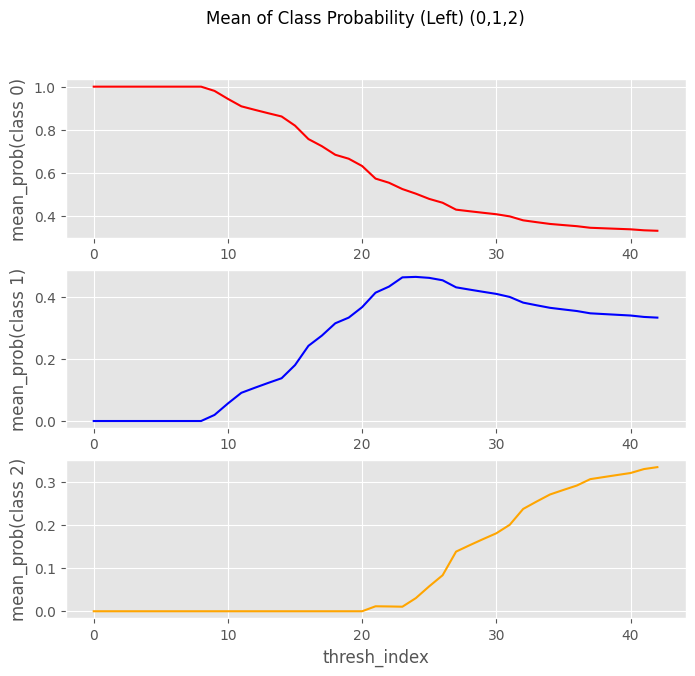

In [145]:
figsize = (8, 7)
fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=figsize)
axs1.plot(np.arange(prob_class_left.shape[0]), prob_class_left[:,0], color='red')
axs1.set_ylabel('mean_prob(class 0)')

axs2.plot(np.arange(prob_class_left.shape[0]), prob_class_left[:,1], color='blue')
axs2.set_ylabel('mean_prob(class 1)')

axs3.plot(np.arange(prob_class_left.shape[0]), prob_class_left[:,2], color='orange')
axs3.set_ylabel('mean_prob(class 2)')
axs3.set_xlabel('thresh_index')

plt.style.use('ggplot')
plt.suptitle('Mean of Class Probability (Left) (0,1,2)')
plt.show()

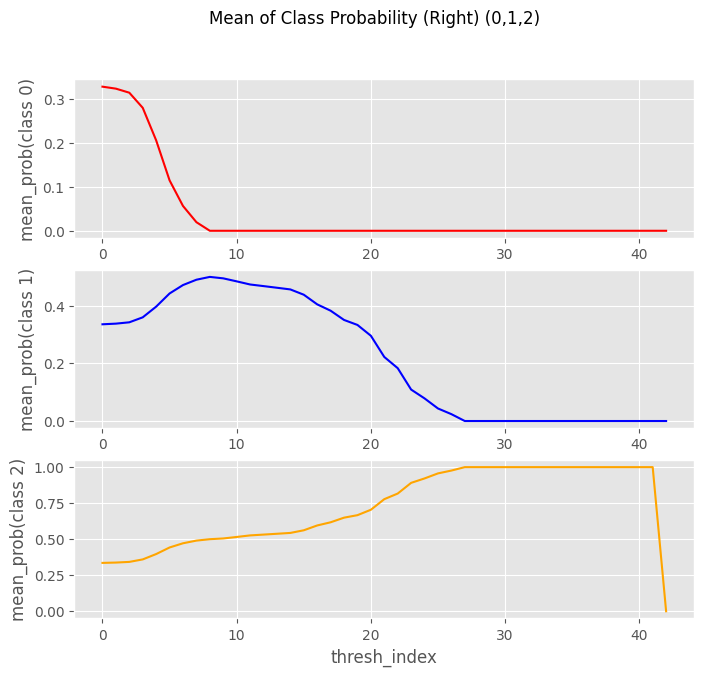

In [157]:
figsize = (8, 7)

fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=figsize)
axs1.plot(np.arange(prob_class_right.shape[0]), prob_class_right[:,0], color='red')
axs1.set_ylabel('mean_prob(class 0)')

axs2.plot(np.arange(prob_class_right.shape[0]), prob_class_right[:,1], color='blue')
axs2.set_ylabel('mean_prob(class 1)')

axs3.plot(np.arange(prob_class_right.shape[0]), prob_class_right[:,2], color='orange')
axs3.set_ylabel('mean_prob(class 2)')
axs3.set_xlabel('thresh_index')

plt.style.use('ggplot')
plt.suptitle('Mean of Class Probability (Right) (0,1,2)')
plt.show()

### Now we can compute the Gini Index

$G_i = \sum_{c=1}^{C} \hat{\pi_{ic}} (1 - \hat{\pi_{ic}})$ 

$G_i = \sum_{c=1}^C \hat{\pi_{ic}} - \sum_{c=1}^C \hat{\pi_{ic}}^2$

$G_i = 1 - \sum_{c=1} \hat{\pi_{ic}}^2$

prob_class_left.shape =  (43, 3)
prob_class_right.shape =  (43, 3)


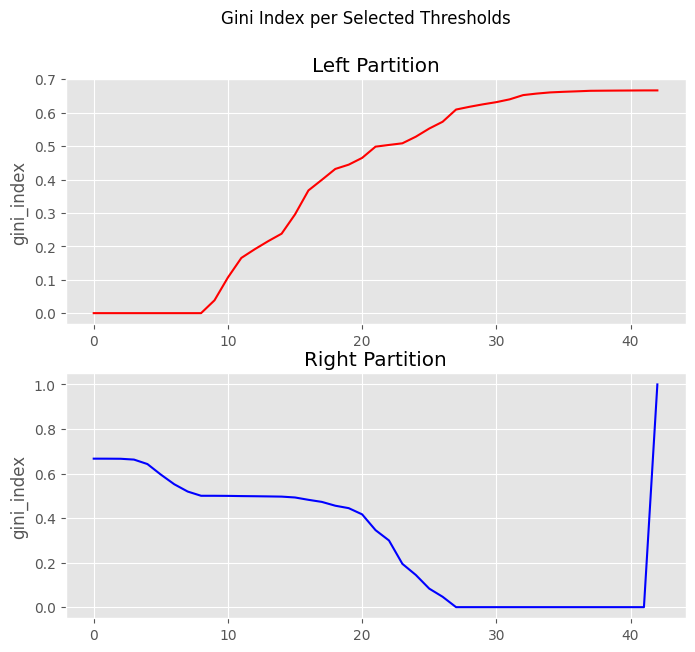

In [158]:
print('prob_class_left.shape = ', prob_class_left.shape)
print('prob_class_right.shape = ', prob_class_right.shape)

gini_index_left = 1 - np.sum(prob_class_left ** 2, axis=1)
gini_index_right = 1 - np.sum(prob_class_right ** 2, axis=1)

figsize = (8, 7)

fig, (axs1, axs2) = plt.subplots(2, 1, figsize=figsize)
axs1.plot(np.arange(gini_index_left.shape[0]), gini_index_left, color='red')
axs1.set_ylabel('gini_index')
axs1.set_title('Left Partition')

axs2.plot(np.arange(gini_index_right.shape[0]), gini_index_right, color='blue')
axs2.set_ylabel('gini_index')
axs2.set_title('Right Partition')

plt.style.use('ggplot')
plt.suptitle('Gini Index per Selected Thresholds')
plt.show()


#### Comment on Gini Index
- Now that's an Interesting Spike after calculating $G_i$. Those spikes are where the ones the highest probability of classification error lies (w.r.t thresholds)

#### How About Entropy?

$H_i = H(\hat{\pi_{ic}}) = -\sum_{c=1}^{C} \hat{\pi_{ic}} \space log \space \hat{\pi_{ic}}$

prob_class_left.shape =  (43, 3)
prob_class_right.shape =  (43, 3)


/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_2827/136448013.py:5: RuntimeWarning: divide by zero encountered in divide
  inv_prob_left = np.where(prob_class_left > 0.0, 1 / prob_class_left, 0.0)
/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_2827/136448013.py:6: RuntimeWarning: divide by zero encountered in divide
  inv_prob_right = np.where(prob_class_right > 0.0, 1 / prob_class_right, 0.0)
/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_2827/136448013.py:7: RuntimeWarning: divide by zero encountered in log2
  log_prob_left = np.where(inv_prob_left > 0.0, np.log2(inv_prob_left), 0.0)
/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_2827/136448013.py:8: RuntimeWarning: divide by zero encountered in log2
  log_prob_right = np.where(inv_prob_right > 0.0, np.log2(inv_prob_right), 0.0)


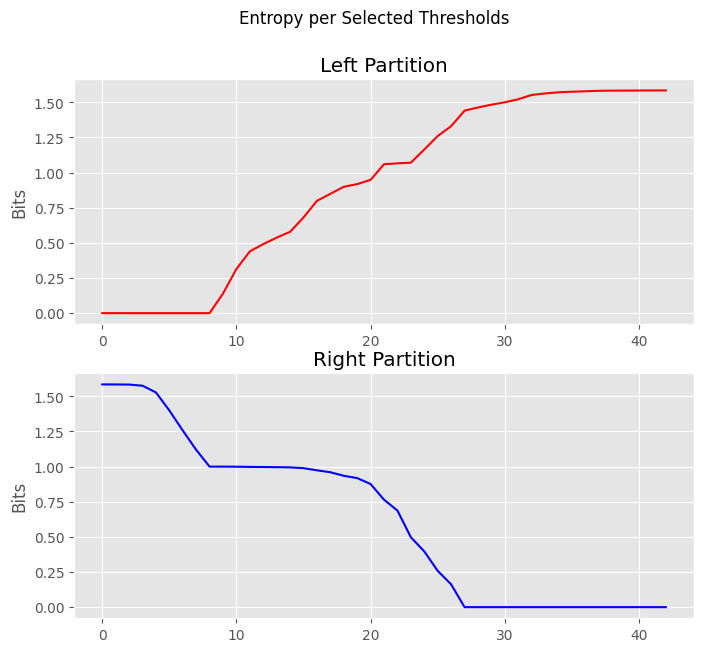

In [160]:
print('prob_class_left.shape = ', prob_class_left.shape)
print('prob_class_right.shape = ', prob_class_right.shape)


inv_prob_left = np.where(prob_class_left > 0.0, 1 / prob_class_left, 0.0)
inv_prob_right = np.where(prob_class_right > 0.0, 1 / prob_class_right, 0.0)
log_prob_left = np.where(inv_prob_left > 0.0, np.log2(inv_prob_left), 0.0)
log_prob_right = np.where(inv_prob_right > 0.0, np.log2(inv_prob_right), 0.0)

entropy_left = np.sum(prob_class_left * log_prob_left, axis=1)
entropy_right = np.sum(prob_class_right * log_prob_right, axis=1)

figsize = (8, 7)

fig, (axs1, axs2) = plt.subplots(2, 1, figsize=figsize)
axs1.plot(np.arange(entropy_left.shape[0]), entropy_left, color='red')
axs1.set_ylabel('Bits')
axs1.set_title('Left Partition')

axs2.plot(np.arange(entropy_right.shape[0]), entropy_right, color='blue')
axs2.set_ylabel('Bits')
axs2.set_title('Right Partition')

plt.style.use('ggplot')
plt.suptitle('Entropy per Selected Thresholds')
plt.show()


### Quick Observation between Gini Index VS Entropy
- The regions where entropy gradually decreases is actually more intutive, since it gradually decreases. Whereas, in Gini Index, they're just sudden spikes - **It's actually a bug**

#### Now the Weighted Sum of the Cost on both Left VS Right Partition

$(j_i, t_i) = \arg \min_{j \in \{1,..,D\}} \min_{t \in T_j} \frac{|D^L_i (j,t)|}{|D_i|} c(D^L_i(j,t)) + \frac{|D^R_i (j,t)|}{|D_i|} c(D^R_i(j,t))$

In [161]:
total_samples = X.shape[0]
print('total_samples = ', total_samples)
print('')

print('num_sampled_left.shape = ', num_sampled_left[:,0].shape)
print('gini_index_left.shape = ', gini_index_left.shape)
print('entropy_left.shape = ', entropy_left.shape)

print('')
print('num_sampled_right.shape = ', num_sampled_right[:,0].shape)
print('gini_index_right.shape = ', gini_index_right.shape)
print('entropy_right.shape = ', entropy_right.shape)

total_samples =  150

num_sampled_left.shape =  (43,)
gini_index_left.shape =  (43,)
entropy_left.shape =  (43,)

num_sampled_right.shape =  (43,)
gini_index_right.shape =  (43,)
entropy_right.shape =  (43,)


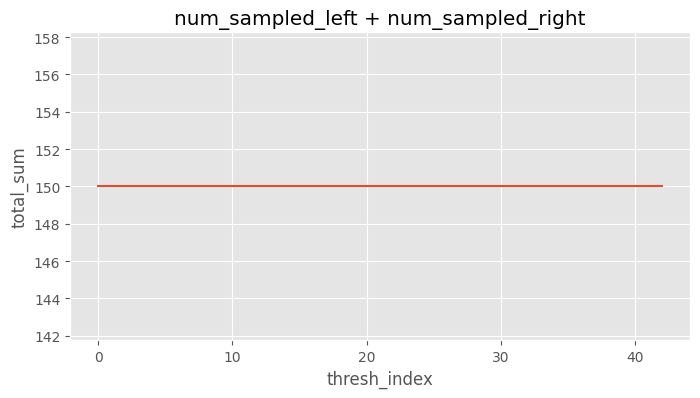

In [162]:
total_samples_vect = num_sampled_left[:,0] + num_sampled_right[:,0]
figsize = (8, 4)

plt.figure(figsize=figsize)
plt.style.use('ggplot')
plt.plot(np.arange(total_samples_vect.shape[0]), total_samples_vect)
plt.title('num_sampled_left + num_sampled_right')
plt.xlabel('thresh_index')
plt.ylabel('total_sum')
plt.show()

weighted_gini.shape =  (43,)
weighted_entropy.shape =  (43,)
min_gini_index =  8
min_entropy_index =  8


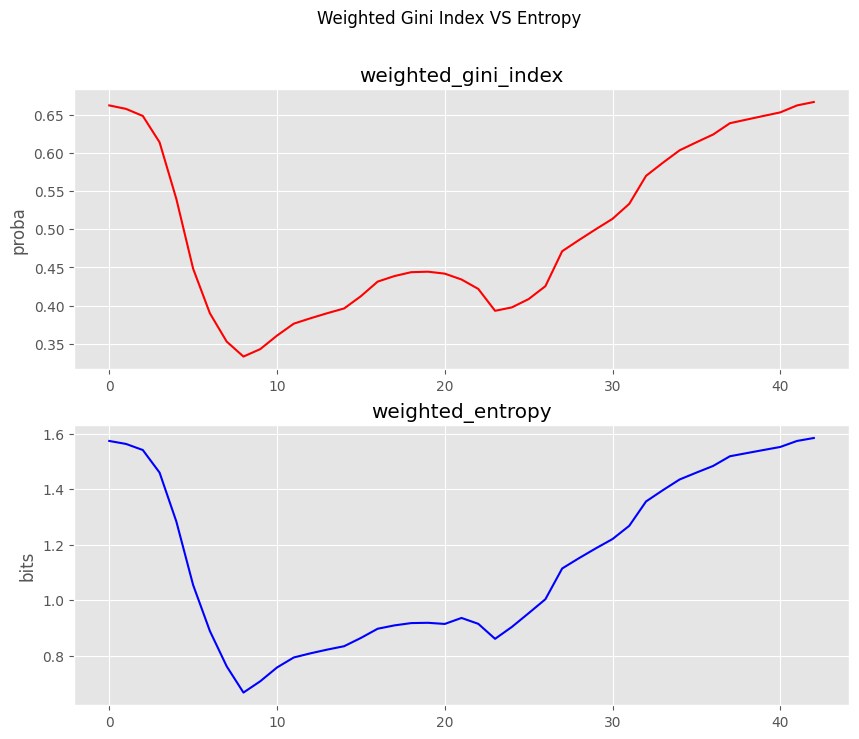

In [164]:
left_ratio = num_sampled_left[:,0] / total_samples
right_ratio = num_sampled_right[:,0] / total_samples

weighted_gini = left_ratio * gini_index_left + right_ratio * gini_index_right
weighted_entropy = left_ratio * entropy_left + right_ratio * entropy_right

min_gini_index = np.argmin(weighted_gini)
min_entropy_index = np.argmin(weighted_entropy)

print('weighted_gini.shape = ', weighted_gini.shape)
print('weighted_entropy.shape = ', weighted_entropy.shape)

print('min_gini_index = ', min_gini_index)
print('min_entropy_index = ', min_entropy_index)

figsize = (10, 8)

fig, (axs1, axs2) = plt.subplots(2, 1, figsize=figsize)
axs1.plot(np.arange(weighted_gini.shape[0]), weighted_gini, color='red')
axs1.set_ylabel('proba')
axs1.set_title('weighted_gini_index')

axs2.plot(np.arange(weighted_entropy.shape[0]), weighted_entropy, color='blue')
axs2.set_ylabel('bits')
axs2.set_title('weighted_entropy')

plt.style.use('ggplot')
plt.suptitle('Weighted Gini Index VS Entropy')
plt.show()


#### Something Wrong with my Calculations
- I would expect that my Gini Index would be Convex/Concave shaped.

#### Bug Found: In calculations of Gini Index

**We have:**
```python
gini_index_left = 1 - np.sum(prob_class_left, axis=1) ** 2
gini_index_right = 1 - np.sum(prob_class_right, axis=1) ** 2
```

**Instead of:**
```python
gini_index_left = 1 - np.sum(prob_class_left ** 2, axis=1)
gini_index_right = 1 - np.sum(prob_class_right ** 2, axis=1)
```

### Important Lesson:
- Regions where errors are expected to decrease tends to be **continuous and convex shaped**. If you're not finding any convexity where it's expected to arise **(i.e. Like some weird spike)** it might be symptom that something is wrong.
- **Always, and ruthlessly,** visualize your calculations.

### Finally:
- Gini Index and Entropy tends to be tightly correlated. It would be actually easier to deal with Gini Index since it doesn't have the numerical instabilities that logarithm function introduces.